---
---
# **Bagian I: Pendahuluan**
---
---

### **I1. Latar Belakang**

AWS SaaS adalah perusahaan yang bergerak di bidang penyediaan solusi *Software as a Service* (SaaS) untuk perangkat lunak penjualan dan pemasaran bagi perusahaan lain melalui model **Business-to-Business (B2B)**. Dengan cakupan global di 48 negara dan 262 kota, AWS SaaS melayani beragam industri melalui tiga segmen pelanggan: **Small and Medium Business (SMB)**, **Enterprise**, dan **Strategic**. Meskipun memiliki jangkauan pasar yang luas, AWS SaaS berupaya **meningkatkan penjualan** di tengah persaingan yang semakin ketat. Untuk itu, diperlukan analisis data penjualan guna mengidentifikasi peluang pertumbuhan dan mengoptimalkan strategi.

---

## **I2. Pernyataan Masalah**

Perusahaan ingin mengetahui **cara efektif untuk meningkatkan penjualan** melalui pemahaman yang lebih baik tentang pelanggan, produk, wilayah, serta strategi diskon dan segmen industri. Informasi ini dapat membantu perusahaan memprioritaskan sumber daya secara efisien untuk mencapai target penjualan dan pertumbuhan.

Sebagai seorang *data analyst*, kita akan menjawab pertanyaan berikut:

**Bagaimana perusahaan dapat memanfaatkan data penjualan untuk mengidentifikasi peluang pertumbuhan dan meningkatkan penjualan di berbagai dimensi (pelanggan, produk, wilayah, segmen, industri, dan waktu)?**

---
---
# **Bagian II: Dataset, Data Understanding, dan Data Cleaning**
---
---
## **II1. Dataset AWS SaaS**

Untuk menjawab pertanyaan yang sudah dirumuskan sebelumnya, kita kan melakukan analisis data transaksi perusahaan AWS SaaS. Dataset dapat diakses pada link: https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales

Dataset ini berisi data transaksi penjualan dari perusahaan SaaS (Software as a Service) fiktif yang menjual perangkat lunak untuk penjualan dan pemasaran. Setiap baris dalam dataset merepresentasikan produk yang ada dalam sebuah transaksi. Informasi yang disertakan meliputi detail pesanan, pelanggan, produk, penjualan, diskon, dan profit dari transaksi tersebut.

| **Nama Kolom**  | **Deskripsi**                                                                                 |
|-----------------|-----------------------------------------------------------------------------------------------|
| **Row ID**      | Identifikasi unik untuk setiap transaksi, digunakan untuk membedakan satu transaksi dari yang lainnya. |
| **Order ID**    | Identifikasi unik untuk setiap pesanan, yang bisa terdiri dari beberapa produk dalam satu pesanan. |
| **Order Date**  | Tanggal saat pesanan dilakukan. Informasi ini berguna untuk menganalisis tren penjualan dari waktu ke waktu. |
| **Date Key**    | Representasi numerik dari tanggal pesanan dalam format YYYYMMDD. Digunakan untuk pemrosesan atau agregasi data berdasarkan tanggal secara lebih efisien. |
| **Contact Name**| Nama orang yang melakukan pemesanan. Ini menunjukkan perwakilan perusahaan yang terlibat dalam transaksi. |
| **Country**     | Negara tempat pesanan dilakukan, untuk analisis penjualan berdasarkan wilayah geografis secara nasional. |
| **City**        | Kota tempat pesanan dilakukan, untuk analisis penjualan yang lebih detail pada tingkat kota.     |
| **Region**      | Wilayah (region) tempat pesanan dilakukan, digunakan untuk menganalisis penjualan berdasarkan wilayah yang lebih besar (seperti bagian dari negara). |
| **Subregion**   | Subwilayah dari wilayah yang lebih besar (region), memberikan detail tambahan untuk analisis geografis. |
| **Customer**    | Nama perusahaan yang melakukan pemesanan. Digunakan untuk memahami pelanggan utama dan menganalisis pola pembelian. |
| **Customer ID** | Identifikasi unik untuk setiap pelanggan. Berguna untuk melacak transaksi yang dilakukan oleh perusahaan tertentu. |
| **Industry**    | Industri dari pelanggan yang melakukan pemesanan, seperti teknologi, manufaktur, dan lain-lain. Informasi ini membantu dalam analisis penjualan berdasarkan jenis industri pelanggan. |
| **Segment**     | Segmentasi pelanggan, seperti SMB (Small-Medium Business), Strategic, atau Enterprise. Informasi ini digunakan untuk memahami segmen pelanggan mana yang paling menguntungkan. |
| **Product**     | Produk yang dipesan dalam transaksi tersebut. Berguna untuk analisis performa produk.            |
| **License**     | Kunci lisensi untuk produk yang dipesan. Ini adalah informasi teknis terkait penggunaan produk.  |
| **Sales**       | Jumlah total penjualan dari transaksi tersebut, yang menunjukkan nilai pendapatan dari penjualan produk. |
| **Quantity**    | Jumlah item yang terlibat dalam transaksi. Ini memberikan gambaran volume penjualan.             |
| **Discount**    | Diskon yang diberikan pada transaksi tersebut. Informasi ini penting untuk menganalisis dampak diskon terhadap penjualan dan profitabilitas. |
| **Profit**      | Keuntungan yang diperoleh dari transaksi tersebut, dihitung dari selisih penjualan dan biaya. Digunakan untuk memahami profitabilitas dari penjualan produk tertentu. |

---


In [807]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_colwidth', None)

In [808]:
# Membaca Dataset
df = pd.read_csv('Cleaned_AWS_SaaS.csv')

# Melihat 5 data teratas untuk memastikan data sudah termuat dengan benar
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


---
## **II.2. Data Understanding**

Tahap ini dilakukan setelah pembacaan dataset untuk memahami struktur dan karakteristik umum data, seperti jumlah kolom, tipe data, distribusi nilai, dan rentang waktu. Langkah ini membantu mengidentifikasi potensi masalah dan memahami distribusi data, sehingga mempersiapkan strategi yang tepat untuk pembersihan, transformasi, dan analisis data selanjutnya.

Tahap ini meliputi:
>- II.2.1 Menampilkan Informasi Dasar Mengenai Dataset
>- II.2.2 Menampilkan Statistik Deskriptif Numerik dan Kategorikal
>- II.2.3 Menampilkan Nilai Unik di Setiap Kolom

#### **II.2.1. Menampilkan informasi dasar mengenai dataset**

Dataset AWS SaaS terdiri dari 19 kolom dan 9994 entri tanpa nilai kosong. Kolom-kolomnya mencakup informasi seperti ID pesanan, tanggal, kontak, lokasi, produk, dan detail penjualan, yang akan membantu analisis penjualan.

In [809]:
# Menampilkan informasi umum mengenai dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

**Insight**

>Berdasarkan hasil `df.info()`, dataset memiliki **9994 baris** dan **19 kolom**, tanpa nilai kosong pada kolom manapun. Kolom terdiri dari berbagai tipe data, termasuk **integer** (`int64`), **float** (`float64`), dan **object** (string). Secara spesifik, terdapat 4 kolom bertipe integer, 3 kolom bertipe float, dan 12 kolom bertipe object. Penggunaan memori adalah **1.4 MB**, yang masih cukup efisien untuk diolah lebih lanjut. Informasi ini menunjukkan bahwa dataset sudah memiliki tipe data yang bervariasi untuk memungkinkan analisis lebih dalam, namun transformasi tipe data seperti tanggal akan dilakukan untuk mempermudah analisis waktu.

**II.2.3. Menampilkan Statistik Deskriptif Numerik dan Kategorikal**

Analisis statistik deskriptif kolom numerik, membantu memahami distribusi data, nilai rata-rata, standar deviasi, nilai minimum, dan maksimum yang dapat mengindikasikan outlier, tren, dan variasi antar data.

Pengecekan frekuensi kategori pada kolom kategorikal membantu mengetahui proporsi tiap kategori, mendeteksi ketidakseimbangan data, serta membantu dalam memahami karakteristik kelompok data yang relevan untuk analisis lebih lanjut.

In [810]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


**Insight 1:**

Berdasarkan statistik deskriptif, terlihat bahwa profit memiliki nilai minimum yang negatif (-6599.98), menunjukkan adanya transaksi rugi yang besar. Nilai rata-rata profit adalah 28.66 dengan standar deviasi 234.26, yang menunjukkan variasi profit yang cukup besar. Penjualan (Sales) rata-rata adalah 229.86, namun terdapat variasi tinggi (std 623.25), menunjukkan perbedaan signifikan antar transaksi. Kuantitas rata-rata 3.79 dan diskon rata-rata 0.15, dengan maksimum 0.8, menunjukkan penggunaan diskon dalam skala kecil. Analisis ini menunjukkan adanya fluktuasi besar dalam profit dan penjualan yang perlu diperhatikan untuk pengambilan keputusan bisnis.


**Insight 2:**

Berdasarkan hasil statistik deskriptif kolom kategorikal, terlihat bahwa wilayah United States mendominasi transaksi dengan frekuensi 2001, diikuti oleh kota London dengan 922 kali. Region EMEA paling sering muncul dengan frekuensi 4219, dan subregion NAMER sebanyak 2507. Pelanggan yang paling sering bertransaksi adalah Allianz (192 kali) dan industri yang paling dominan adalah Finance (2127 kali). Segment SMB paling banyak, dengan total 5191 transaksi, dan produk yang paling banyak digunakan adalah ContactMatcher (1842 kali). Insight ini menunjukkan adanya konsentrasi besar dalam wilayah tertentu (khususnya Amerika Serikat dan London), industri keuangan, dan segmen SMB.


#### **II.2.3. Menampilkan Semua Nilai Unik Setiap Kolom**

Tahap ini dilakukan dengan mengecek semua nilai unik yang ada di setiap kolom untuk memastikan bahwa semua entri ditulis dengan benar, tanpa kesalahan pengejaan atau penggunaan istilah yang tidak konsisten. Hal ini juga bertujuan untuk menghindari kesalahan penamaan atau entri yang tidak sesuai, sehingga hasil analisis menjadi lebih valid dan dapat dipercaya.

In [811]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 20201226, 20200920

**Insight**
1. **Row ID**:  memiliki nilai unik sebanyak 9994 yang berarti semua baris memiliki ID unik yang merepresentasikan tiap transaksi. 

2. **Order ID** menunjukkan 5009 nilai unik, menandakan beberapa pesanan memiliki lebih dari satu baris karena produk yang berbeda dalam satu pesanan. Terdapat pola dalam Order ID berdasarkan wilayah dan tahun pesanan dibuat.

3. **Order Date** dan **Date Key** masing-masing memiliki jumlah 1237 nilai unik menunjukkan tanggal pemesanan yang dilakukan. Dua kolom ini memiliki jumlah yang sama dan nilai yang sama sehingga perlu dilakukan penghapusan salah satu kolom karena alasan redundansi.

4. **Contact Name** terdapat 793 nilai unik, mengindikasikan bahwa beberapa kontak melakukan lebih dari satu transaksi. Karena karakteristik bisnis AWS SaaS adalah B2B, maka kolom Contact Name hanyalah representasi dari individual yang mewakili perusahaan (pelanggan utama).

5. **Country** dan **City** masing-masing memiliki 48 dan 262 nilai unik, menandakan jangkauan bisnis yang cukup luas, mencakup banyak negara dan kota.

6. **Region** dan **Subregion** menunjukkan wilayah yang sudah dikelompokkan, dengan 3 region (EMEA, AMER, APJ) dan 12 subregion (ANZ, APAC, EU, EU-EAST, IND, LATAM, MEA, NAMER, NOR, UKIR), mengindikasikan struktur geografis pasar yang tersegmentasi.

7. **Customer** dan **Customer ID** masing-masing memiliki 99 nilai unik, menunjukkan bahwa bisnis ini melayani 99 pelanggan unik dengan ID unik yang berbeda-beda. Kolom Customer berisi nama perusahaan yang melakukan pembelian.

10. **Industry** menunjukkan 10 kategori berbeda, dengan keterlibatan banyak sektor industri, yang menunjukkan diversifikasi bisnis.

11. **Segment** terdapat 3 nilai unik yang terdiri dari kategori seperti SMB, Strategic, dan Enterprise, yang menunjukkan segmentasi pasar.

12. **Product** memiliki 14 nilai unik, yang menunjukkan variasi produk yang cukup banyak dalam penawaran.

13. **License** memiliki 9994 nilai unik, yang berarti setiap lisensi bersifat unik dan tidak ada yang berulang.

14. **Sales** memiliki 5825 nilai unik, menunjukkan variasi besar dalam nilai penjualan antar transaksi.

15. **Quantity** menunjukkan 14 nilai unik, menandakan kisaran yang tidak terlalu lebar untuk jumlah produk yang dijual per transaksi.

16. **Discount** memiliki 12 nilai unik, menunjukkan adanya beberapa variasi diskon yang diterapkan pada transaksi.

17. **Profit** menunjukkan 7287 nilai unik, menunjukkan variasi profit yang besar, yang dapat mencerminkan kerugian maupun keuntungan signifikan di berbagai transaksi.

### **II.D. Menampilkan Rentang Waktu Transaksi Dataset**
Mengetahui rentang waktu penjualan membantu memahami periode data yang tersedia.

In [812]:
# Melihat rentang waktu penjualan
print(f"Periode Dataset AWS SaaS:\n- Start: {df['Order Date'].min()}\n- End: {df['Order Date'].max()}")

Periode Dataset AWS SaaS:
- Start: 1/1/2023
- End: 9/9/2023


---
---
# **Bagian III: Data Analysis, Visualization, Insight and Recommendation**
---
---

Kita sudah melakukan tahap *data cleaning*. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu

### **III.1 Analisis Penjualan Berdasarkan Dimensi Utama**
Setelah mendapatkan pemahaman dasar tentang data Kita sudah melakukan tahap *data cleaning*. , langkah pertama dalam analisis mendalam adalah melihat penjualan berdasarkan beberapa dimensi utama, seperti produk, wilayah, pelanggan, industri, dan segmentasi pelanggan. Ini membantu kita memahami area yang berkontribusi besar dan menemukan peluang peningkatan penjualan.

**III.1.1. Analisis Penjualan Berdasarkan Produk**
Berikutnya, kita akan menganalisis penjualan berdasarkan dimensi produk. Dengan fokus ini, kita ingin menjawab pertanyaan:
- Produk mana yang memiliki penjualan tertinggi dan terendah?



In [830]:
# Calculate total sales per product
product_sales = df.groupby('Product')['Sales'].sum().reset_index()

# Sort products by sales in descending order to identify top and bottom contributors
product_sales = product_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Display top 5 and bottom 5 products by sales
top_5_products = product_sales.head(5)
bottom_5_products = product_sales.tail(5)

print('Produk dengan Penjualan Tertinggi')
display(top_5_products)
print('Produk dengan Penjualan Terendah') 
display(bottom_5_products)

Produk dengan Penjualan Tertinggi


,Product,Sales
0,ContactMatcher,410378.265
1,FinanceHub,340935.415
2,Site Analytics,330007.054
3,Marketing Suite - Gold,223843.608
4,Big Ol Database,189238.631


Produk dengan Penjualan Terendah


,Product,Sales
9,OneView,107532.161
10,SaaS Connector Pack,91705.164
11,ChatBot Plugin,27118.792
12,SaaS Connector Pack - Gold,16476.402
13,Storage,3024.280


<Figure size 1200x800 with 0 Axes>

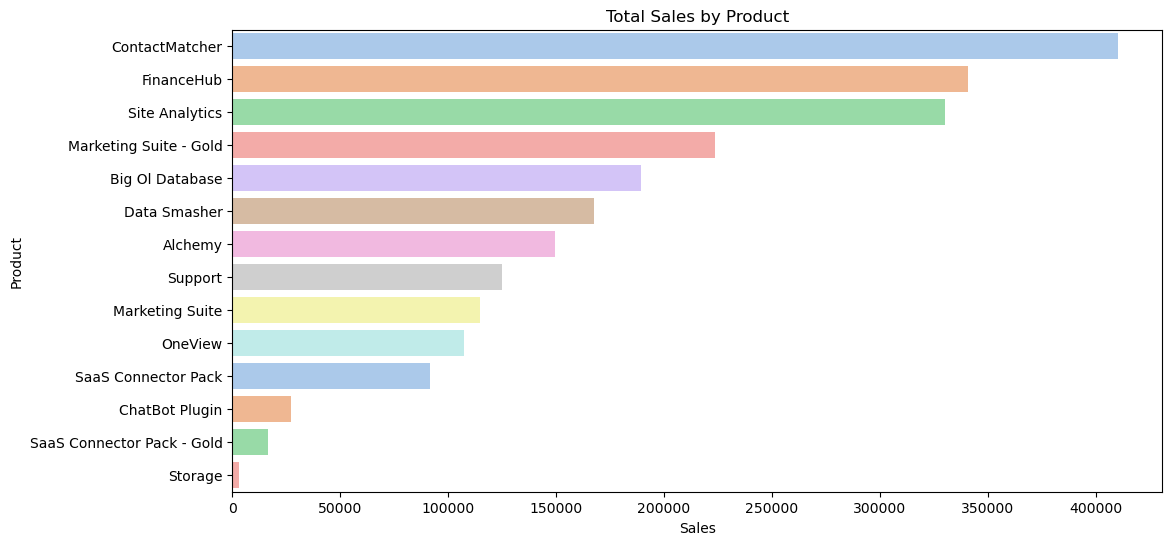

In [831]:
# Define the figure size for all plots
plt.figure(figsize=(12, 8))

# 1. Visualisasi Penjualan Berdasarkan Produk
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, x='Sales', y='Product', palette='pastel')
plt.title('Total Sales by Product')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

**Insight**

Dari analisis di atas, kita bisa menjawab pertanyaan berikut:

>*Produk mana saja yang memiliki penjualan tertinggi dan terendah?*
>- ContactMatcher, FinanceHub, Site Analytics, adalah 3 produk dengan penjualan tertinggi.
>- Storage, SaaS Connector Pack - Gold, ChatBot Plugin, adalah 3 produk dengan penjualan tertinggi

**III.1.2. Analisis Penjualan Berdasarkan Wilayah**

Selanjutnya, mari kita lihat penjualan berdasarkan wilayah untuk memahami area geografis yang berkontribusi besar dan mana yang membutuhkan perhatian lebih. Beberapa pertanyaan yang bisa kita jawab dalam analisis ini adalah:
- Wilayah mana yang memberikan kontribusi penjualan terbesar dan terkecil?

In [832]:
# Calculate total sales per region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Sort regions by sales in descending order to identify top and bottom contributors
region_sales = region_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Display the sales per region
region_sales

,Region,Sales
0,EMEA,1.043887e+06
1,AMER,8.378496e+05
2,APJ,4.154642e+05


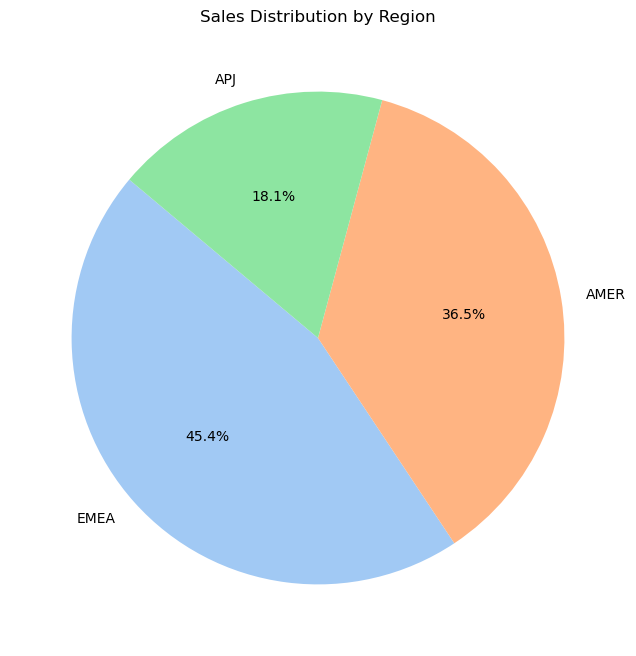

In [833]:
# 2. Pie chart for Sales by Region
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(region_sales['Region'])))
plt.title('Sales Distribution by Region')
plt.show()

**Insight**

Dari analisis di atas, kita bisa menjawab pertanyaan berikut:

>*Wilayah mana yang memberikan kontribusi penjualan terbesar dan terkecil?*
>- EMEA memberikan kontribusi penjualan terbesar diikuti oleh AMER, sementara APJ merupakan wilayah dengan kontribusi terendah.

**III.1.3. Analisis Penjualan Berdasarkan Pelanggan**

Setelah melihat wilayah, sekarang kita akan beralih ke dimensi pelanggan. Dengan menganalisis penjualan berdasarkan pelanggan, kita bisa menjawab pertanyaan:
- Siapa pelanggan dengan kontribusi penjualan terbesar dan terkecil?

In [834]:
# Calculate total sales per customer
customer_sales = df.groupby('Customer')['Sales'].sum().reset_index()

# Sort customers by sales in descending order to identify top and bottom contributors
customer_sales = customer_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Display top 5 and bottom 5 customers by sales
top_5_customers = customer_sales.head(5)
bottom_5_customers = customer_sales.tail(5)

display(top_5_customers, bottom_5_customers)

,Customer,Sales
0,Anthem,55719.2100
1,Ford Motor,43893.0424
2,Allianz,42904.1670
3,Bank of America Corp.,41255.9471
4,Valero Energy,41220.4188


,Customer,Sales
94,Tesco,8173.226
95,Berkshire Hathaway,7100.929
96,Safeway,6633.137
97,Citigroup,6132.521
98,Gazprom,5402.902


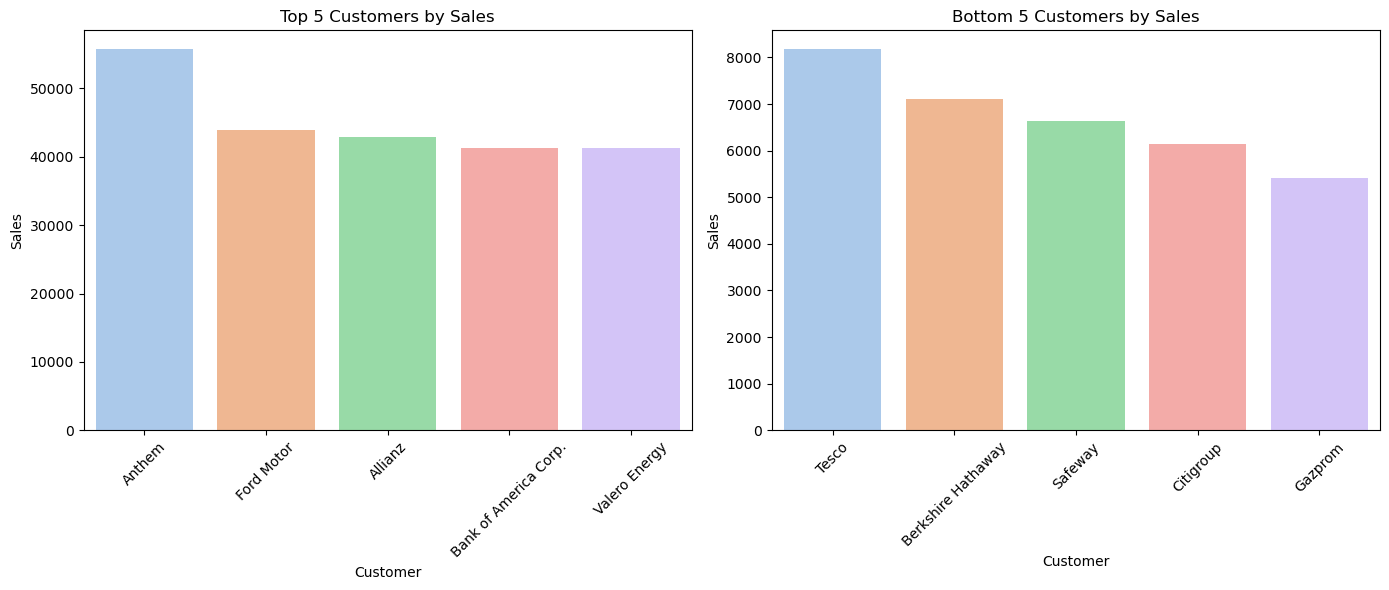

In [835]:
# 3. Bar chart for Top 5 and Bottom 5 Customers by Sales
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Top 5 customers
sns.barplot(data=top_5_customers, x='Customer', y='Sales', ax=ax[0], palette='pastel')
ax[0].set_title('Top 5 Customers by Sales')
ax[0].set_xlabel('Customer')
ax[0].set_ylabel('Sales')
ax[0].tick_params(axis='x', rotation=45)

# Bottom 5 customers
sns.barplot(data=bottom_5_customers, x='Customer', y='Sales', ax=ax[1], palette='pastel')
ax[1].set_title('Bottom 5 Customers by Sales')
ax[1].set_xlabel('Customer')
ax[1].set_ylabel('Sales')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insight**

Dari grafik di atas, kita bisa menjawab pertanyaan berikut:

>*Siapa pelanggan dengan kontribusi penjualan terbesar dan terkecil?*
>- Anthem, Ford Motor, dan Allianz, adalah 3 pelanggan utama dengan kontribusi penjualan terbesar.
>- Gazprom, Citigroup, dan Safeway, adalah 3 pelanggan dengan kontribusi penjualan terkecil

**III.1.4. Analisis Penjualan Berdasarkan Industri**

Setelah memahami kontribusi pelanggan, mari kita tinjau penjualan berdasarkan industri untuk menemukan sektor dengan penjualan tertinggi dan peluang untuk industri lainnya. Pertanyaan yang akan kita jawab adalah:
- Industri apa yang paling mendominasi penjualan?
- Apakah ada industri lain yang memiliki potensi untuk ditingkatkan?

In [836]:
# Calculate total sales per industry
industry_sales = df.groupby('Industry')['Sales'].sum().reset_index()

# Sort industries by sales in descending order to identify top and bottom contributors
industry_sales = industry_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Display top 5 and bottom 5 industries by sales
top_5_industries = industry_sales.head(5)
bottom_5_industries = industry_sales.tail(5)

print('5 Industri Teratas')
display(top_5_industries) 
print('5 Industri Terendah')
display(bottom_5_industries)

5 Industri Teratas


,Industry,Sales
0,Finance,474150.4844
1,Energy,304644.1409
2,Manufacturing,295192.3812
3,Healthcare,273183.2882
4,Tech,263169.0277


5 Industri Terendah


,Industry,Sales
5,Consumer Products,224044.1422
6,Retail,223072.0720
7,Communications,120962.2365
8,Transportation,90191.3276
9,Misc,28591.7596


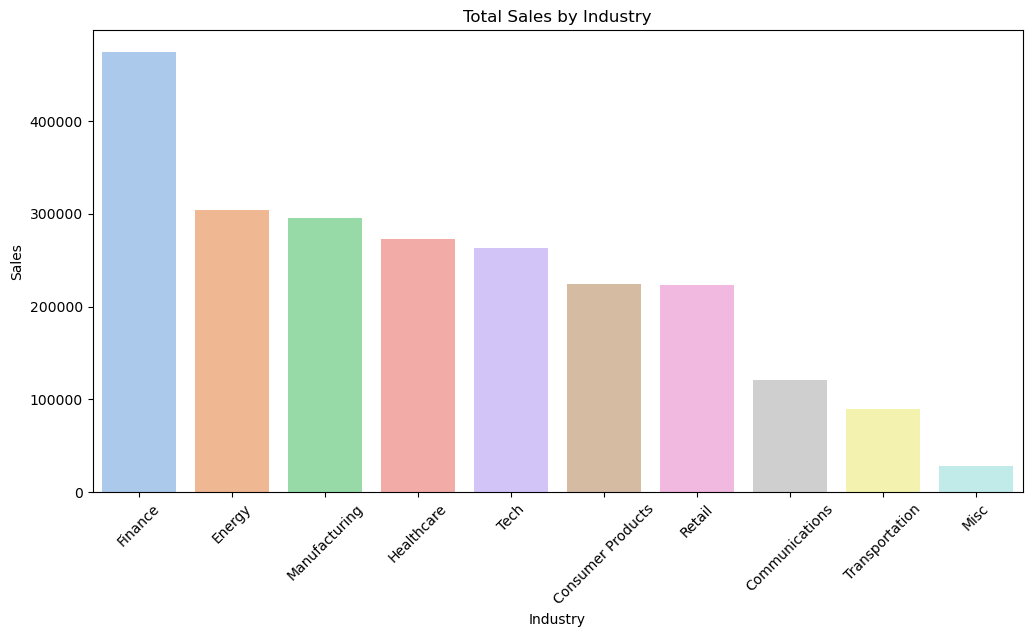

In [837]:
# 4. Bar chart for Sales by Industry
plt.figure(figsize=(12, 6))
sns.barplot(data=industry_sales, x='Industry', y='Sales', palette='pastel')
plt.title('Total Sales by Industry')
plt.xlabel('Industry')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**Insight**

Dari grafik di atas, kita bisa menjawab pertanyaan berikut:

>*Industri apa yang paling mendominasi penjualan?*
>- Industri Finance, Energy, dan Manufacturing, memiliki kontribusi terbesar terhadap penjualan.
>- *Apakah ada industri lain yang memiliki potensi untuk ditingkatkan?* Industri dengan kontribusi rendah seperti Misc, Transportation, dan Communication, dapat menjadi peluang bagi tim sales untuk memperluas pangsa pasar. 

**III.1.5. Analisis Penjualan Berdasarkan Segmentasi Pelanggan**

Berikutnya, kita akan melihat penjualan berdasarkan segmen pelanggan. Fokus analisis ini adalah untuk menjawab:
- Segmen pelanggan mana yang memberikan kontribusi paling besar?

In [838]:
# Calculate total sales per customer segment
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Sort segments by sales in descending order to identify top and bottom contributors
segment_sales = segment_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Display the sales per segment
display(segment_sales)

,Segment,Sales
0,SMB,1.161401e+06
1,Strategic,7.061464e+05
2,Enterprise,4.296531e+05


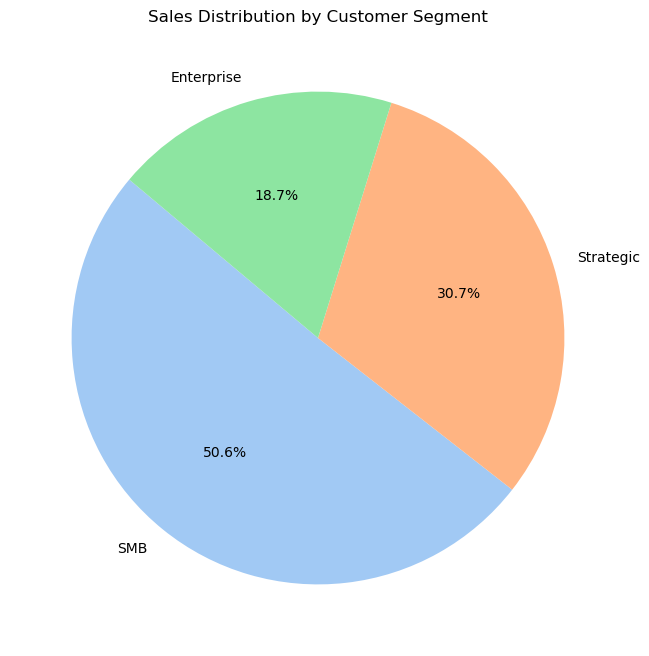

In [839]:
# 5. Pie chart for Sales by Customer Segment
plt.figure(figsize=(8, 8))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel", len(segment_sales['Segment'])))
plt.title('Sales Distribution by Customer Segment')
plt.show()

**Insight**

Dari hasil analisis, kita bisa menjawab pertanyaan:

>*Segmen pelanggan mana yang memberikan kontribusi yang paling besar terhadap penjualan?*
>- Segmen SMB adalah kontributor terbesar terhadap penjualan sebesar 50%.


---
### **III.2. Analisis Korelasi antara Sales, Profit, Quantity, dan Discount**
Melalui analisis korelasi ini, kita ingin memahami hubungan antara variabel-variabel kunci yang berpotensi memengaruhi penjualan. 

Pertanyaan-pertanyaan berikut ini akan membantu kita menggali insight lebih dalam:

- Apakah ada hubungan positif antara jumlah penjualan (Sales) dan profit? Bagaimana ini dapat dimanfaatkan untuk mendorong penjualan?
- Bagaimana pengaruh pemberian diskon (Discount) terhadap penjualan dan profit? Apakah diskon cenderung meningkatkan volume penjualan atau justru menurunkan profit secara signifikan?
- Apakah peningkatan jumlah produk yang terjual (Quantity) berhubungan erat dengan peningkatan penjualan secara keseluruhan?

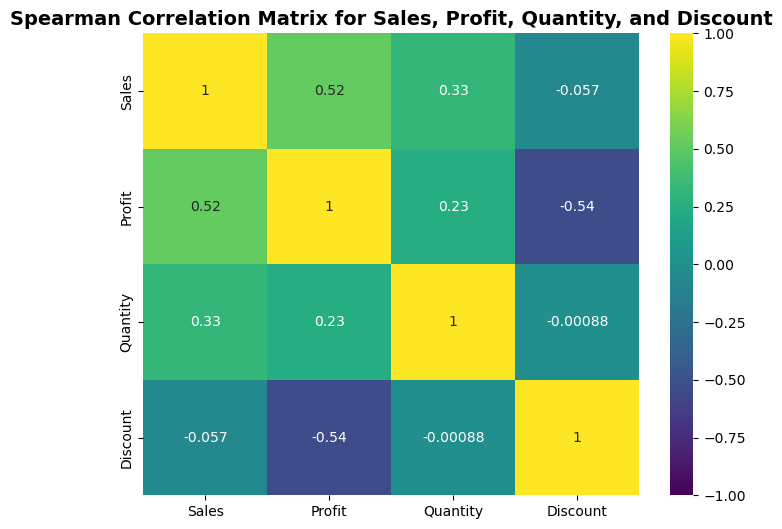

Normality Test Results (Shapiro-Wilk):
Sales: Statistic=0.9820648440401365, p-value=0.0, Result: tidak normal
Profit: Statistic=0.7179722426806663, p-value=0.0, Result: tidak normal
Quantity: Statistic=0.8872958956683907, p-value=0.0, Result: tidak normal
Discount: Statistic=0.5, p-value=0.0, Result: tidak normal

Spearman Correlation Matrix:


,Sales,Profit,Quantity,Discount
Sales,1.000000,0.518407,0.327426,-0.056969
Profit,0.518407,1.000000,0.234491,-0.543350
Quantity,0.327426,0.234491,1.000000,-0.000878
Discount,-0.056969,-0.543350,-0.000878,1.000000


In [840]:
from scipy.stats import kstest

# Step 1: Uji Normalitas (Kolmogorov-Smirnov Test)
# Menentukan apakah distribusi data normal atau tidak menggunakan threshold 0.05

# Dictionary untuk menyimpan hasil uji normalitas
normality_results = {}

for column in ['Sales', 'Profit', 'Quantity', 'Discount']:
    stat, p_value = kstest(df[column], 'norm')  # Melakukan KS test dengan asumsi distribusi normal
    if p_value <= 0.05:
        result = 'tidak normal'  # Ha: Distribusi tidak normal
    else:
        result = 'distribusi normal'  # Ho: Distribusi normal
    normality_results[column] = {'Statistic': stat, 'p-value': p_value, 'Result': result}

# Step 2: Pilih Korelasi Spearman jika data tidak normal
# Menghitung Spearman Correlation Matrix jika data tidak normal
spearman_corr_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr(method='spearman')

# Step 3: Visualisasi Heatmap Korelasi Spearman
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Spearman Correlation Matrix for Sales, Profit, Quantity, and Discount', fontsize=14, fontweight='bold')
plt.show()

# Display normality test results with interpretation
print("Normality Test Results (Shapiro-Wilk):")
for var, result in normality_results.items():
    print(f"{var}: Statistic={result['Statistic']}, p-value={result['p-value']}, Result: {result['Result']}")

print("\nSpearman Correlation Matrix:")
display(spearman_corr_matrix)

**Insight**

Dari hasil analisis korelasi dan tambahan segmentasi, kita bisa menjawab pertanyaan-pertanyaan berikut:

>*Apakah ada hubungan positif antara jumlah penjualan (Sales) dan profit? Bagaimana ini dapat dimanfaatkan untuk mendorong penjualan?*
>- Ya, terdapat korelasi positif yang cukup kuat antara Sales dan Profit, yaitu sebesar 0.5184. Artinya, peningkatan penjualan cenderung sejalan dengan peningkatan profit. Tim sales bisa memanfaatkan insight ini dengan fokus pada peningkatan volume penjualan melalui strategi upsell atau cross-sell untuk meningkatkan kontribusi profit dari penjualan yang lebih tinggi.

>*Bagaimana pengaruh pemberian diskon (Discount) terhadap penjualan dan profit? Apakah diskon cenderung meningkatkan volume penjualan atau justru menurunkan profit secara signifikan?* 
>- Korelasi negatif antara Discount dan Profit sebesar -0.5434 menunjukkan bahwa diskon besar dapat berdampak negatif pada profit. Menariknya, korelasi antara Discount dan Sales adalah kecil, yaitu -0.057, yang menandakan bahwa diskon tidak selalu efektif dalam meningkatkan penjualan secara signifikan. Tim sales mungkin perlu lebih selektif dalam memberikan diskon dan mempertimbangkan strategi lain yang lebih efektif untuk meningkatkan penjualan tanpa mengorbankan profit.

>*Apakah peningkatan jumlah produk yang terjual (Quantity) berhubungan erat dengan peningkatan penjualan secara keseluruhan?*
>- Korelasi positif antara Quantity dan Sales sebesar 0.3274 menunjukkan bahwa peningkatan jumlah produk yang terjual berpotensi meningkatkan total penjualan. Strategi upsell dan peningkatan kuantitas produk per transaksi bisa menjadi fokus tim sales untuk mendorong penjualan lebih tinggi, terutama jika pendekatan ini sesuai dengan kebutuhan pelanggan di segmen tertentu.

**III.2.1 Analisis Korelasi Tambahan berdasarkan Korelasi Segmentasi Pelanggan**

Melakukan analisis lebih mendalam pada wilayah atau industri tertentu akan membantu tim sales untuk menargetkan area atau sektor dengan potensi penjualan yang tinggi, terutama di area yang menunjukkan korelasi kuat antara kuantitas produk dan total penjualan. 

Pertanyaan yang akan kita jawab melalui analisis ini adalah:

- Apakah ada variasi dalam pengaruh korelasi di setiap segmen pelanggan (misalnya, SMB, Strategic, Enterprise)? Bagaimana strategi penjualan perlu disesuaikan untuk tiap segmen berdasarkan hasil korelasi ini?
- Apakah terdapat pola hubungan yang berbeda di antara wilayah atau industri tertentu yang dapat membantu mengidentifikasi area dengan potensi penjualan yang lebih tinggi?

Korelasi Berdasarkan Segmen Pelanggan (Spearman):

Segment: SMB
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.498868  0.326707 -0.049349
Profit    0.498868  1.000000  0.246217 -0.547786
Quantity  0.326707  0.246217  1.000000 -0.014407
Discount -0.049349 -0.547786 -0.014407  1.000000

Segment: Strategic
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.530715  0.326123 -0.080600
Profit    0.530715  1.000000  0.215559 -0.553618
Quantity  0.326123  0.215559  1.000000  0.001638
Discount -0.080600 -0.553618  0.001638  1.000000

Segment: Enterprise
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.554063  0.331107 -0.039288
Profit    0.554063  1.000000  0.233103 -0.512371
Quantity  0.331107  0.233103  1.000000  0.033204
Discount -0.039288 -0.512371  0.033204  1.000000


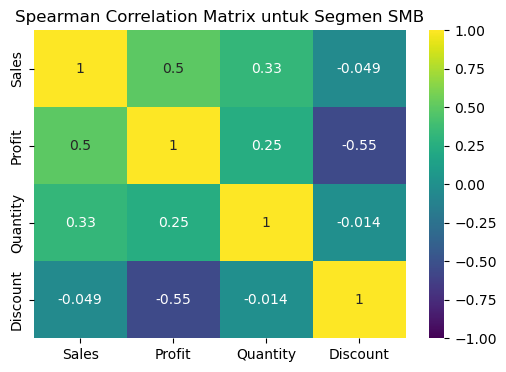

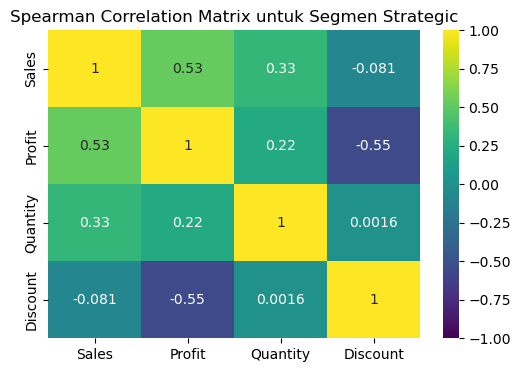

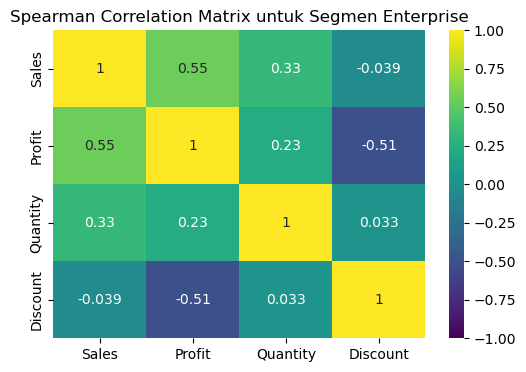


Korelasi Berdasarkan Wilayah (Spearman):

Wilayah: EMEA
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.535933  0.344855 -0.088153
Profit    0.535933  1.000000  0.257115 -0.559396
Quantity  0.344855  0.257115  1.000000 -0.015348
Discount -0.088153 -0.559396 -0.015348  1.000000

Wilayah: AMER
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.605632  0.320507  0.116573
Profit    0.605632  1.000000  0.286045 -0.307887
Quantity  0.320507  0.286045  1.000000  0.010636
Discount  0.116573 -0.307887  0.010636  1.000000

Wilayah: APJ
             Sales    Profit  Quantity  Discount
Sales     1.000000  0.301904  0.310495 -0.209017
Profit    0.301904  1.000000  0.103755 -0.743032
Quantity  0.310495  0.103755  1.000000  0.009358
Discount -0.209017 -0.743032  0.009358  1.000000


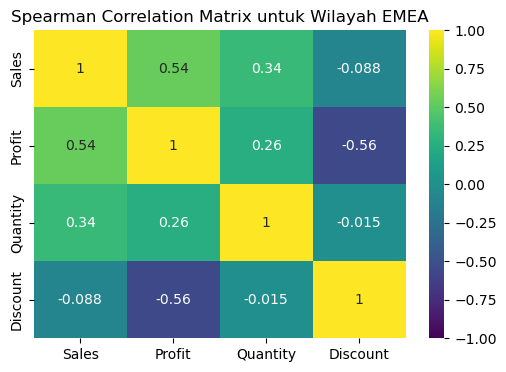

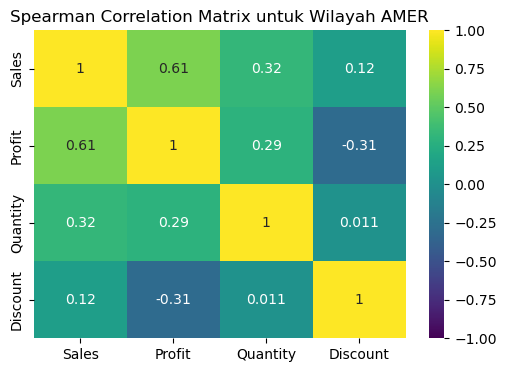

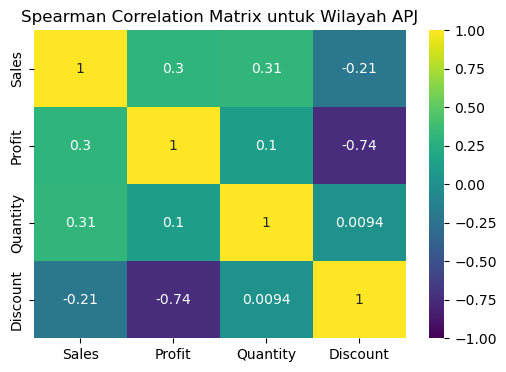

In [841]:
# Langkah 1: Korelasi Berdasarkan Segmen Pelanggan (Customer Segments)
# Menghitung korelasi Spearman untuk setiap segmen pelanggan
segment_corr_results = {}
for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]
    # Menghitung matriks korelasi Spearman untuk kolom numerik pada setiap segmen
    segment_corr = segment_data[['Sales', 'Profit', 'Quantity', 'Discount']].corr(method='spearman')
    segment_corr_results[segment] = segment_corr

# Menampilkan hasil korelasi untuk setiap segmen pelanggan
print("Korelasi Berdasarkan Segmen Pelanggan (Spearman):")
for segment, corr in segment_corr_results.items():
    print(f"\nSegment: {segment}")
    print(corr)

# Memvisualisasikan matriks korelasi untuk setiap segmen pelanggan menggunakan heatmap
for segment, corr in segment_corr_results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="viridis", vmin=-1, vmax=1)
    plt.title(f'Spearman Correlation Matrix untuk Segmen {segment}')
    plt.show()

# Langkah 2: Korelasi Berdasarkan Wilayah (Regional Segments)
# Menghitung korelasi Spearman untuk setiap wilayah
region_corr_results = {}
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    # Menghitung matriks korelasi Spearman untuk kolom numerik pada setiap wilayah
    region_corr = region_data[['Sales', 'Profit', 'Quantity', 'Discount']].corr(method='spearman')
    region_corr_results[region] = region_corr

# Menampilkan hasil korelasi untuk setiap wilayah
print("\nKorelasi Berdasarkan Wilayah (Spearman):")
for region, corr in region_corr_results.items():
    print(f"\nWilayah: {region}")
    print(corr)

# Memvisualisasikan matriks korelasi untuk setiap wilayah menggunakan heatmap
for region, corr in region_corr_results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="viridis", vmin=-1, vmax=1)
    plt.title(f'Spearman Correlation Matrix untuk Wilayah {region}')
    plt.show()

**Insight**

Dari hasil analisis korelasi tambahan segmentasi, kita bisa menjawab pertanyaan-pertanyaan berikut:

>*Apakah ada variasi dalam pengaruh korelasi di setiap segmen pelanggan (misalnya, SMB, Strategic, Enterprise)? Bagaimana strategi penjualan perlu disesuaikan untuk tiap segmen berdasarkan hasil korelasi ini?*
>- Analisis menunjukkan bahwa segmen Enterprise memiliki korelasi tertinggi antara Sales dan Profit, yaitu 0.5545. Ini menunjukkan bahwa peningkatan penjualan di segmen ini paling berdampak pada profit. Di sisi lain, SMB dan Strategic menunjukkan korelasi yang signifikan tetapi sedikit lebih rendah. Dengan ini, tim sales bisa fokus pada peningkatan penjualan di segmen Enterprise dengan strategi upsell atau peningkatan volume, sementara segmen lain bisa difokuskan pada strategi diskon yang lebih hati-hati.

>*Apakah terdapat pola hubungan yang berbeda di antara wilayah atau industri tertentu yang dapat membantu mengidentifikasi area dengan potensi penjualan yang lebih tinggi?* 
>- Hasil analisis korelasi tambahan yang dibedakan per wilayah atau industri akan memberikan insight lebih lanjut tentang area atau sektor yang potensial. Sebagai contoh, jika wilayah atau industri tertentu menunjukkan hubungan korelasi positif yang kuat antara Quantity dan Sales, tim sales dapat meningkatkan fokus pada wilayah tersebut untuk kampanye upsell atau volume penjualan.

---
### **III.3 Analisis Pareto untuk Mengidentifikasi Peluang Utama**
1. Produk apa saja yang masuk ke dalam 20% teratas yang menyumbang 80% dari total penjualan? Bagaimana tim sales bisa memanfaatkan produk-produk ini untuk meningkatkan penjualan secara keseluruhan?

2. Siapa saja pelanggan utama yang menyumbang porsi terbesar penjualan? Apakah ada pelanggan yang layak diprioritaskan untuk strategi upsell atau retensi?

3. Wilayah mana yang memberikan kontribusi terbesar terhadap penjualan? Apakah ada wilayah dengan potensi besar yang belum tergarap maksimal oleh tim sales?

4. Industri mana yang mendominasi penjualan? Bagaimana pemahaman ini dapat membantu tim sales untuk memperkuat penjualan di industri-industri yang paling berkontribusi?

5. Apakah segmen pelanggan tertentu (misalnya, SMB, Strategic, atau Enterprise) lebih dominan dalam kontribusi penjualan? Bagaimana strategi penjualan dapat difokuskan untuk meningkatkan penjualan pada segmen utama ini?

6. Apakah ada pola tertentu dalam waktu (misalnya, bulan atau kuartal tertentu) yang menyumbang porsi besar dari penjualan? Bagaimana tim sales dapat memanfaatkan pola ini untuk meningkatkan penjualan pada waktu-waktu strategis?

In [842]:
# Function to calculate Pareto cumulative percentage
def calculate_pareto(df, value_col, group_col):
    pareto_df = df.groupby(group_col)[value_col].sum().reset_index()
    pareto_df = pareto_df.sort_values(by=value_col, ascending=False).reset_index(drop=True)
    pareto_df['Cumulative Sales %'] = pareto_df[value_col].cumsum() / pareto_df[value_col].sum() * 100
    return pareto_df

# Apply Pareto calculation for each dimension: Product, Customer, Region, Industry, Segment
pareto_product = calculate_pareto(df, 'Sales', 'Product')
pareto_customer = calculate_pareto(df, 'Sales', 'Customer')
pareto_region = calculate_pareto(df, 'Sales', 'Region')
pareto_industry = calculate_pareto(df, 'Sales', 'Industry')
pareto_segment = calculate_pareto(df, 'Sales', 'Segment')

# Display top 20% contributors for each dimension
top_pareto_product = pareto_product[pareto_product['Cumulative Sales %'] <= 80]
top_pareto_customer = pareto_customer[pareto_customer['Cumulative Sales %'] <= 80]
top_pareto_region = pareto_region[pareto_region['Cumulative Sales %'] <= 80]
top_pareto_industry = pareto_industry[pareto_industry['Cumulative Sales %'] <= 80]
top_pareto_segment = pareto_segment[pareto_segment['Cumulative Sales %'] <= 80]

print('Top Pareto Products:')
display(top_pareto_product)


Top Pareto Products:


,Product,Sales,Cumulative Sales %
0,ContactMatcher,410378.265,17.864274
1,FinanceHub,340935.415,32.705615
2,Site Analytics,330007.054,47.071231
3,Marketing Suite - Gold,223843.608,56.815421
4,Big Ol Database,189238.631,65.053213
5,Data Smasher,167380.318,72.339486
6,Alchemy,149528.030,78.848626


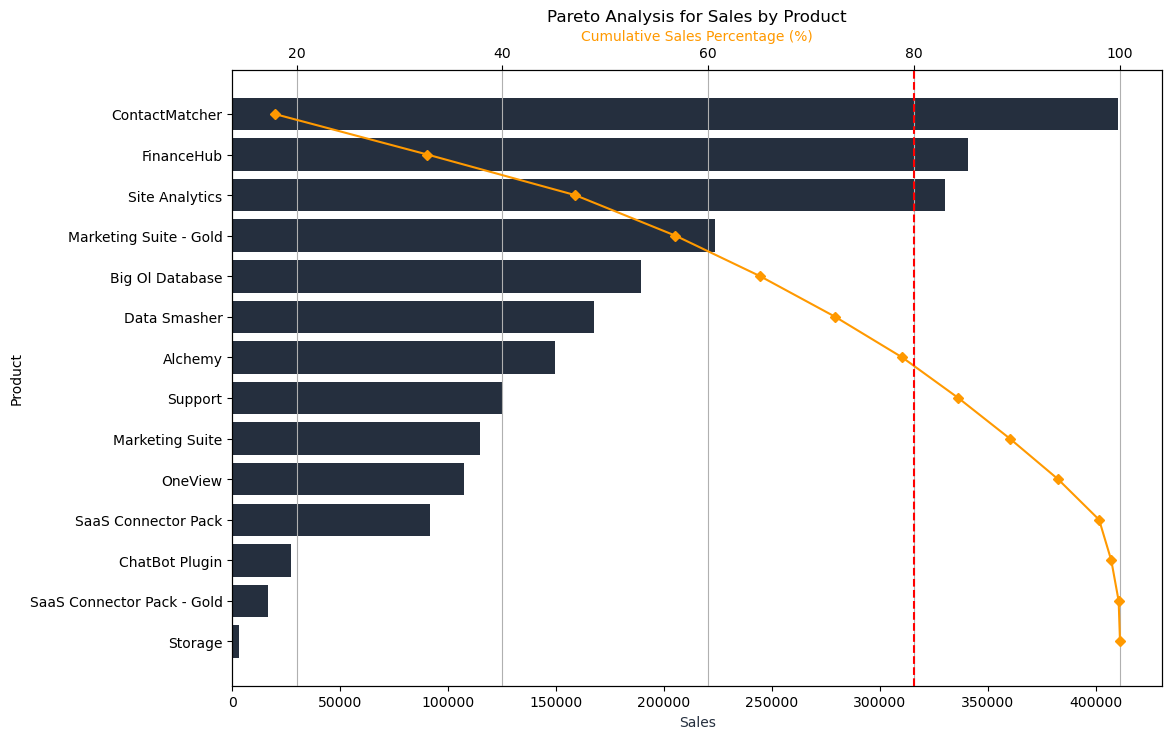

In [843]:
# Horizontal bar plot for Pareto Analysis of Products
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.barh(pareto_product['Product'], pareto_product['Sales'], color="C0")
ax1.set_ylabel('Product')
ax1.set_xlabel('Sales', color="C0")
ax1.invert_yaxis()  # Invert y-axis for highest sales at the top

# Plot Cumulative Percentage line
ax2 = ax1.twiny()
ax2.plot(pareto_product['Cumulative Sales %'], pareto_product['Product'], color="C1", marker="D", ms=5)
ax2.set_xlabel('Cumulative Sales Percentage (%)', color="C1")
ax2.axvline(80, color="r", linestyle="--")

plt.title('Pareto Analysis for Sales by Product')
plt.grid()
plt.show()

**Insight:**
>Produk ContactMatcher, FinanceHub, dan Site Analytics menyumbang hampir 80% dari total penjualan. Fokus pada produk-produk ini dapat memberikan dampak signifikan terhadap peningkatan penjualan.

In [844]:
print('Top Pareto Customers:')
display(top_pareto_customer)

Top Pareto Customers:


,Customer,Sales,Cumulative Sales %
0,Anthem,55719.2100,2.425526
1,Ford Motor,43893.0424,4.336245
2,Allianz,42904.1670,6.203916
3,Bank of America Corp.,41255.9471,7.999839
4,Valero Energy,41220.4188,9.794215
5,Lowes,40360.1630,11.551143
6,Tyson Foods,40326.3440,13.306598
7,Allstate,39941.6400,15.045307
8,AmerisourceBergen,39234.7610,16.753245
9,BMW,39083.7900,18.454611


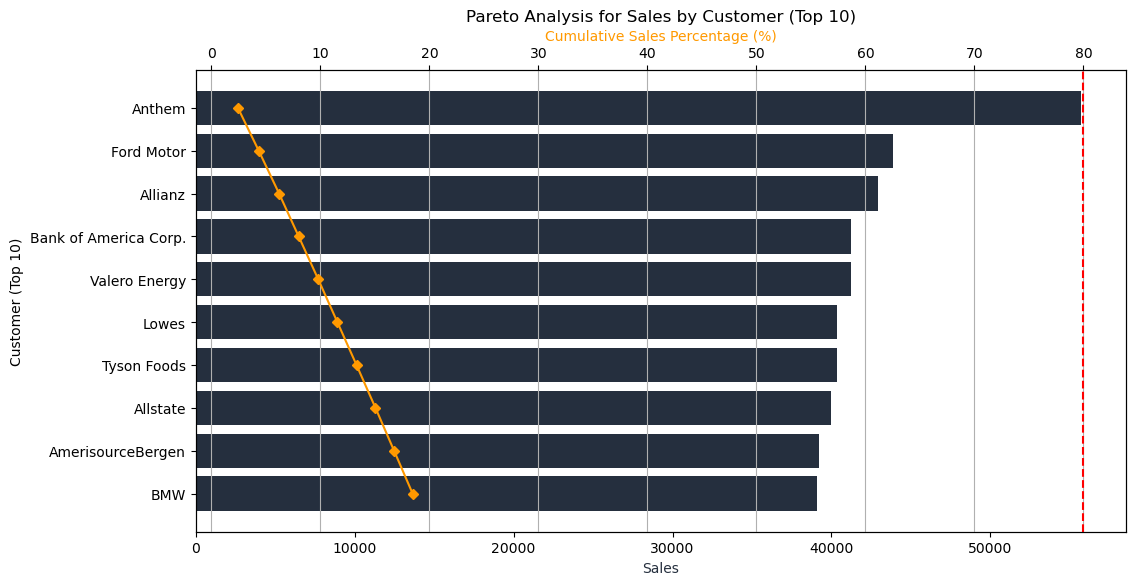

In [845]:
# Horizontal bar plot for Pareto Analysis of Top 10 Customers
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.barh(pareto_customer['Customer'].head(10), pareto_customer['Sales'].head(10), color="C0")
ax1.set_ylabel('Customer (Top 10)')
ax1.set_xlabel('Sales', color="C0")
ax1.invert_yaxis()  # Invert y-axis for highest sales at the top

# Plot Cumulative Percentage line
ax2 = ax1.twiny()
ax2.plot(pareto_customer['Cumulative Sales %'].head(10), pareto_customer['Customer'].head(10), color="C1", marker="D", ms=5)
ax2.set_xlabel('Cumulative Sales Percentage (%)', color="C1")
ax2.axvline(80, color="r", linestyle="--")

plt.title('Pareto Analysis for Sales by Customer (Top 10)')
plt.grid()
plt.show()

**Insight:**
>Sekitar 63 pelanggan utama memberikan kontribusi sebesar 80% dari total penjualan. Prioritaskan pelanggan-pelanggan ini untuk hubungan lebih dekat dan peluang upsell agar meningkatkan penjualan lebih lanjut.

In [846]:
print('Top Pareto Regions:')
display(top_pareto_region)

Top Pareto Regions:


,Region,Sales,Cumulative Sales %
0,EMEA,1043887.015,45.441695


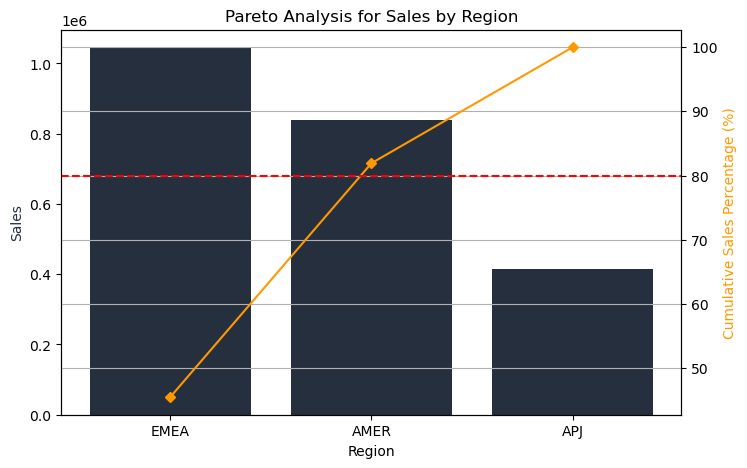

In [847]:
# 3. Pareto Analysis for Regions
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(pareto_region['Region'], pareto_region['Sales'], color="C0")
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales', color="C0")

# Plot Cumulative Percentage line
ax2 = ax1.twinx()
ax2.plot(pareto_region['Region'], pareto_region['Cumulative Sales %'], color="C1", marker="D", ms=5)
ax2.set_ylabel('Cumulative Sales Percentage (%)', color="C1")
ax2.axhline(80, color="r", linestyle="--")

plt.title('Pareto Analysis for Sales by Region')
plt.grid()
plt.show()

**Insight:**
>Wilayah EMEA memberikan kontribusi tertinggi, mendekati 80% dari total penjualan. Memfokuskan upaya penjualan di wilayah ini dapat memberikan hasil yang optimal.

In [848]:
print('Top Pareto Industries:')
display(top_pareto_industry)

Top Pareto Industries:


,Industry,Sales,Cumulative Sales %
0,Finance,474150.4844,20.640358
1,Energy,304644.1409,33.901895
2,Manufacturing,295192.3812,46.751985
3,Healthcare,273183.2882,58.643992
4,Tech,263169.0277,70.100066
5,Consumer Products,224044.1422,79.852985


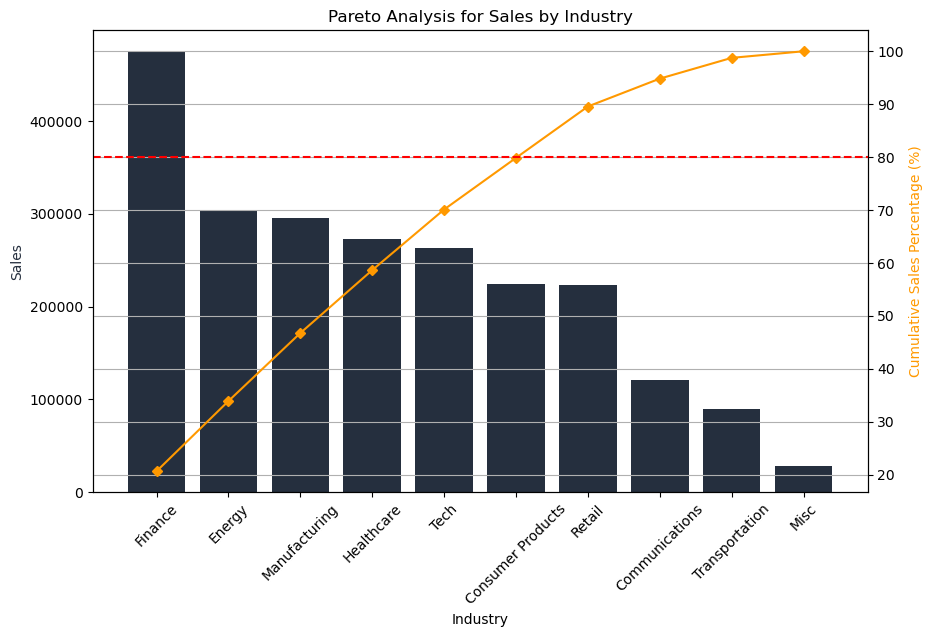

In [849]:
# 4. Pareto Analysis for Industries
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(pareto_industry['Industry'], pareto_industry['Sales'], color="C0")
ax1.set_xlabel('Industry')
ax1.set_ylabel('Sales', color="C0")
ax1.tick_params(axis='x', rotation=45)

# Plot Cumulative Percentage line
ax2 = ax1.twinx()
ax2.plot(pareto_industry['Industry'], pareto_industry['Cumulative Sales %'], color="C1", marker="D", ms=5)
ax2.set_ylabel('Cumulative Sales Percentage (%)', color="C1")
ax2.axhline(80, color="r", linestyle="--")

plt.title('Pareto Analysis for Sales by Industry')
plt.grid()
plt.show()

**Insight:**
>Industri Finance, Energy, dan Manufacturing berkontribusi sekitar 80% dari total penjualan. Strategi khusus untuk mempertahankan dan memperluas penjualan di industri-industri ini dapat meningkatkan hasil.

In [850]:
print('Top Pareto Segments:')
display(top_pareto_segment)

Top Pareto Segments:


,Segment,Sales,Cumulative Sales %
0,SMB,1161401.345,50.55724


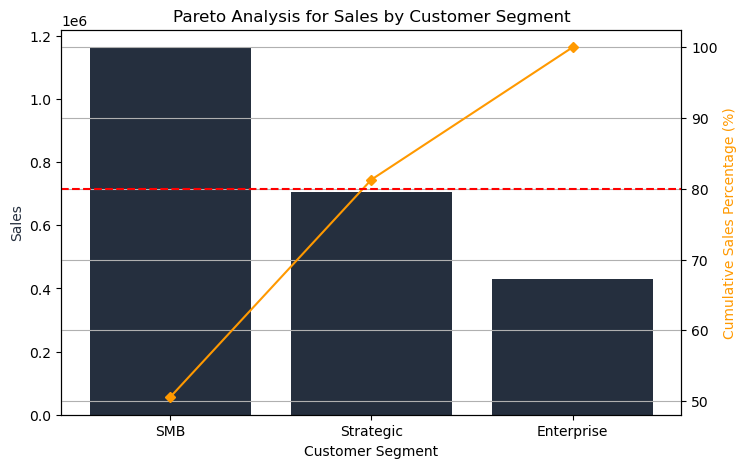

In [851]:
# 5. Pareto Analysis for Customer Segment
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(pareto_segment['Segment'], pareto_segment['Sales'], color="C0")
ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Sales', color="C0")

# Plot Cumulative Percentage line
ax2 = ax1.twinx()
ax2.plot(pareto_segment['Segment'], pareto_segment['Cumulative Sales %'], color="C1", marker="D", ms=5)
ax2.set_ylabel('Cumulative Sales Percentage (%)', color="C1")
ax2.axhline(80, color="r", linestyle="--")

plt.title('Pareto Analysis for Sales by Customer Segment')
plt.grid()
plt.show()

**Insight:**
>Segmen SMB menyumbang lebih dari 50% dari total penjualan, menjadikannya segmen utama. Penawaran yang disesuaikan untuk SMB dapat meningkatkan penjualan secara signifikan.

**Kesimpulan Hasil Analisis Pareto**

Dari hasil analisis Pareto, kita bisa menjawab pertanyaan-pertanyaan di atas sebagai berikut:

>*Produk apa saja yang masuk ke dalam 20% teratas yang menyumbang 80% dari total penjualan? Bagaimana tim sales bisa memanfaatkan produk-produk ini untuk meningkatkan penjualan secara keseluruhan?*

>- Produk yang paling berkontribusi, seperti ContactMatcher dan FinanceHub, menyumbang porsi terbesar dari total penjualan. Tim sales dapat fokus pada strategi upsell atau cross-sell untuk produk-produk ini, dan meningkatkan kampanye pemasaran produk populer ini untuk menarik lebih banyak pelanggan.

>*Siapa saja pelanggan utama yang menyumbang porsi terbesar penjualan? Apakah ada pelanggan yang layak diprioritaskan untuk strategi upsell atau retensi?*
>- Pelanggan utama seperti Anthem dan Ford Motor termasuk dalam 20% pelanggan yang menyumbang 80% dari penjualan. Strategi upsell, retensi, dan personalisasi pelayanan dapat diterapkan kepada mereka untuk memperkuat hubungan dan mendorong penjualan berulang.

>*Wilayah mana yang memberikan kontribusi terbesar terhadap penjualan? Apakah ada wilayah dengan potensi besar yang belum tergarap maksimal oleh tim sales?*
>- Wilayah EMEA dan AMER berkontribusi besar pada total penjualan, sedangkan wilayah APJ memiliki kontribusi lebih rendah. Tim sales dapat mengeksplorasi strategi yang lebih intensif di APJ untuk memperluas pangsa pasar di sana, misalnya melalui kampanye promosi atau kolaborasi lokal.

>*Industri mana yang mendominasi penjualan? Bagaimana pemahaman ini dapat membantu tim sales untuk memperkuat penjualan di industri-industri yang paling berkontribusi?*
>- Industri Finance dan Energy mendominasi penjualan. Tim sales bisa fokus untuk memperkuat strategi di industri-industri ini dengan menawarkan produk yang sesuai dengan kebutuhan spesifik sektor tersebut, atau dengan mengembangkan solusi khusus untuk klien di sektor keuangan dan energi.

>*Apakah segmen pelanggan tertentu (misalnya, SMB, Strategic, atau Enterprise) lebih dominan dalam kontribusi penjualan? Bagaimana strategi penjualan dapat difokuskan untuk meningkatkan penjualan pada segmen utama ini?*
>- Segmen SMB memberikan kontribusi signifikan terhadap penjualan. Tim sales bisa fokus pada strategi yang lebih spesifik untuk SMB, seperti memberikan pelatihan produk atau layanan yang lebih terjangkau untuk mendukung bisnis kecil dan menengah, sehingga meningkatkan loyalitas pelanggan SMB.


---
### **III.4. Analisis Time Series untuk Tren Musiman dan Tahunan**
Dengan melakukan analisis time series, kita ingin memahami pola penjualan berdasarkan waktu, baik secara musiman maupun tahunan. 

Pertanyaan-pertanyaan berikut akan membantu kita mengeksplorasi bagaimana penjualan bervariasi sepanjang tahun dan di bulan-bulan tertentu.

- Apakah terdapat pola peningkatan penjualan dari tahun ke tahun? Jika ya, faktor apa yang mungkin mendukung pertumbuhan ini?

- Bulan apa saja yang secara konsisten menunjukkan penjualan tertinggi setiap tahunnya, dan bagaimana tim sales dapat memanfaatkan pola musiman ini?

- Apakah terdapat bulan atau periode tertentu di mana penjualan cenderung rendah? Apa yang bisa dilakukan untuk meningkatkan penjualan pada periode tersebut?

- Bagaimana tren musiman pada akhir tahun (November dan Desember) dapat dijadikan peluang bagi tim sales untuk kampanye penjualan yang lebih efektif?

- Apakah penurunan penjualan di bulan tertentu (misalnya, Februari) menunjukkan adanya pola yang berulang setiap tahun, dan bagaimana tim sales dapat meresponsnya dengan strategi khusus?

In [852]:
# Extract year and month from Order Date for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Calculate total sales per year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Calculate total sales per month across all years
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Display the sales per year and per month
print('Penjualan Tahunan')
display(yearly_sales)
print('Penjualan Bulanan Kumulatif')
display(monthly_sales)

Penjualan Tahunan


,Year,Sales
0,2020,484247.4981
1,2021,470532.5090
2,2022,608473.8300
3,2023,733947.0232


Penjualan Bulanan Kumulatif


,Month,Sales
0,1,95365.9376
1,2,59913.1934
2,3,199512.4400
3,4,141851.5674
4,5,156122.2867
5,6,147082.6113
6,7,149580.8380
7,8,159589.4510
8,9,309770.0997
9,10,197115.2017


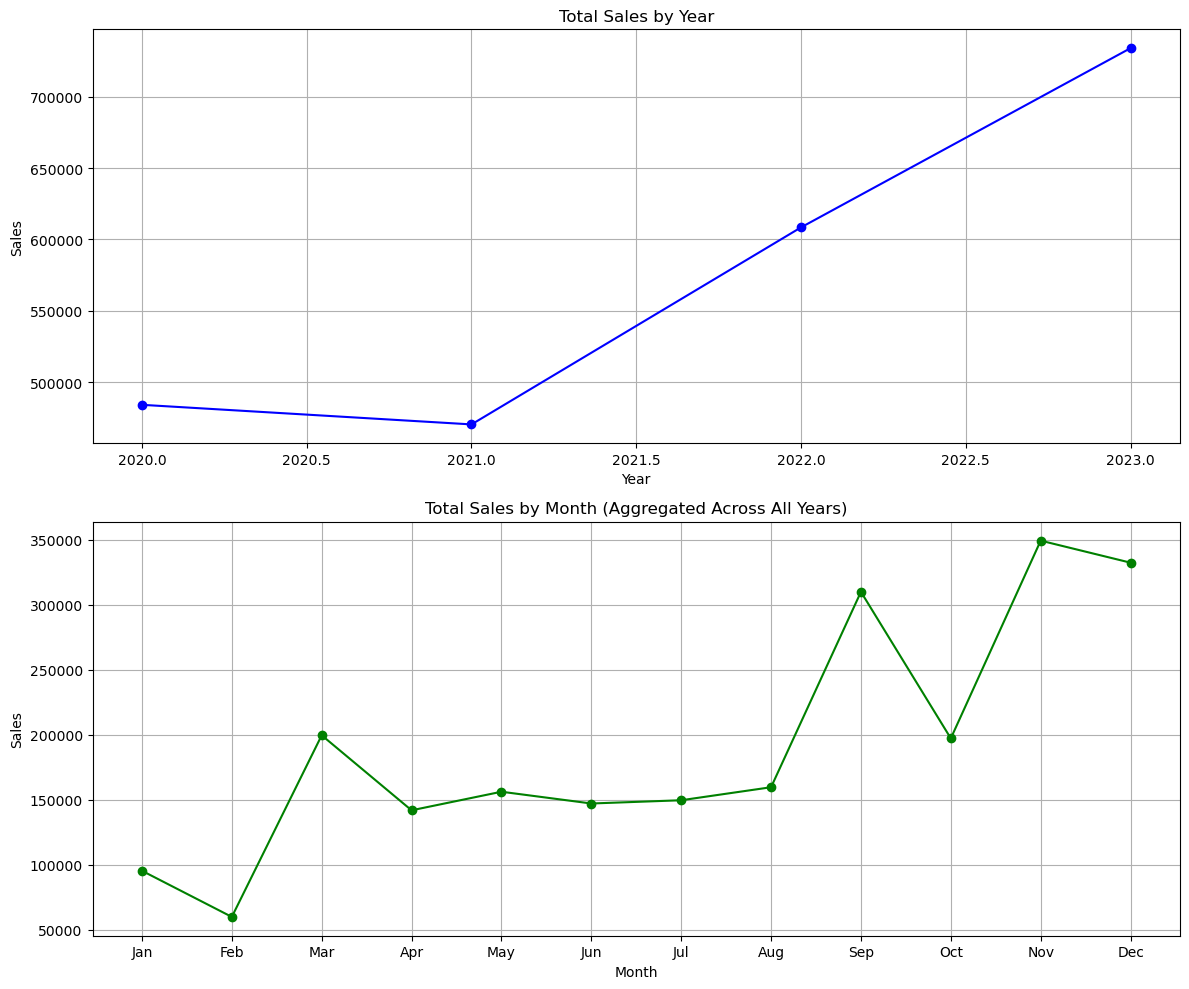

In [853]:
# Visualisasi Penjualan terhadap Waktu (Tahun, Bulan)
# Set up the plotting area
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot yearly sales
ax1.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-', color='b')
ax1.set_title('Total Sales by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.grid(True)

# Plot monthly sales
ax2.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='g')
ax2.set_title('Total Sales by Month (Aggregated Across All Years)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Sales')
ax2.grid(True)
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plots
plt.tight_layout()
plt.show()

**Insight**

Berdasarkan hasil analisis time series, berikut adalah jawaban atas pertanyaan-pertanyaan tersebut:

>*Apakah terdapat pola peningkatan penjualan dari tahun ke tahun? Jika ya, faktor apa yang mungkin mendukung pertumbuhan ini?*
>- Ya, terdapat tren peningkatan penjualan dari tahun ke tahun, dengan peningkatan yang signifikan pada tahun 2023. Ini menunjukkan pertumbuhan penjualan yang stabil, yang bisa disebabkan oleh peningkatan strategi penjualan atau peningkatan loyalitas pelanggan. Tim sales dapat mempertahankan atau meningkatkan strategi yang efektif untuk melanjutkan tren positif ini.

>*Bulan apa saja yang secara konsisten menunjukkan penjualan tertinggi setiap tahunnya, dan bagaimana tim sales dapat memanfaatkan pola musiman ini?*
>- Bulan November dan Desember menunjukkan penjualan tertinggi, yang mengindikasikan adanya pola musiman di akhir tahun. Tim sales bisa memanfaatkan momentum ini dengan merencanakan kampanye promosi atau penawaran khusus menjelang akhir tahun untuk memaksimalkan penjualan pada periode tersebut.

>*Apakah terdapat bulan atau periode tertentu di mana penjualan cenderung rendah? Apa yang bisa dilakukan untuk meningkatkan penjualan pada periode tersebut?*
>- Bulan Februari memiliki penjualan terendah, yang mungkin menunjukkan aktivitas penjualan yang lambat setelah periode liburan. Untuk mengatasi penurunan ini, tim sales bisa mempertimbangkan untuk menjalankan kampanye awal tahun atau strategi promosi yang bertujuan untuk mempertahankan momentum penjualan di bulan yang lebih lambat.

>*Bagaimana tren musiman pada akhir tahun (November dan Desember) dapat dijadikan peluang bagi tim sales untuk kampanye penjualan yang lebih efektif?*
>- Mengingat penjualan puncak terjadi di bulan November dan Desember, tim sales bisa merencanakan kampanye bertema liburan atau diskon akhir tahun untuk menarik lebih banyak pelanggan. Selain itu, tim sales bisa memanfaatkan tren ini untuk upsell atau cross-sell kepada pelanggan yang lebih loyal pada periode tersebut.

>*Apakah penurunan penjualan di bulan tertentu (misalnya, Februari) menunjukkan adanya pola yang berulang setiap tahun, dan bagaimana tim sales dapat meresponsnya dengan strategi khusus?*
>- Penurunan penjualan di bulan Februari tampaknya merupakan pola yang berulang, yang mungkin terkait dengan periode setelah liburan atau awal tahun yang lebih tenang. Tim sales bisa merencanakan strategi peningkatan penjualan, seperti program loyalitas, untuk menjaga aktivitas penjualan tetap stabil di bulan ini atau menawarkan promosi khusus yang menarik pelanggan di awal tahun.


---
### **III.5. Segmentasi Pelanggan Berdasarkan Nilai dan Potensi Penjualan**
Analisis ini berfokus pada pemahaman tentang kontribusi penjualan dari pelanggan dalam tiga segmen utama: High-Value, Medium-Value, dan Low-Value. 

Pertanyaan-pertanyaan berikut membantu kita menggali insight lebih dalam tentang setiap segmen:

- Seberapa besar kontribusi penjualan dari masing-masing segmen pelanggan (High-Value, Medium-Value, dan Low-Value) terhadap total penjualan?

- Bagaimana distribusi jumlah pelanggan dalam setiap segmen dibandingkan dengan kontribusi mereka pada total penjualan?

- Dari industri mana saja pelanggan dalam setiap segmen berasal?

- Wilayah mana yang menjadi pusat dari setiap segmen pelanggan?

- Produk apa yang paling populer di setiap segmen pelanggan?

**Langkah-langkah Pengerjaan**

>Menghitung Total Penjualan per Pelanggan

- Mengumpulkan total nilai penjualan untuk setiap pelanggan untuk mengidentifikasi kontribusi mereka terhadap total penjualan.

>Menentukan Kategori High-Value, Medium-Value, dan Low-Value:

Berdasarkan distribusi penjualan, kita akan mengklasifikasikan pelanggan menjadi tiga kelompok:
- High-Value: Pelanggan dengan kontribusi penjualan tertinggi (misalnya 20% teratas).
- Medium-Value: Pelanggan dengan kontribusi menengah (sekitar 30% berikutnya).
- Low-Value: Pelanggan dengan kontribusi terendah (50% sisanya).

>Analisis dan Segmentasi Pelanggan:

- Setelah pengelompokan, kita akan menganalisis karakteristik masing-masing kelompok untuk memberi rekomendasi yang tepat bagi tim sales.

In [866]:
# Calculate total sales per customer
customer_sales = df.groupby('Customer')['Sales'].sum().reset_index()

# Sort customers by sales in descending order to identify top, medium, and low-value customers
customer_sales = customer_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Define thresholds for segmentation
# High-Value: Top 20% of customers by sales
# Medium-Value: Next 30% of customers by sales
# Low-Value: Remaining 50%

# Calculate number of customers in each segment
total_customers = len(customer_sales)
high_value_count = int(0.2 * total_customers)
medium_value_count = int(0.3 * total_customers)

# Assign segments based on sales rank
customer_sales['Value Segment'] = 'Low-Value'
customer_sales.loc[:high_value_count - 1, 'Value Segment'] = 'High-Value'
customer_sales.loc[high_value_count:high_value_count + medium_value_count - 1, 'Value Segment'] = 'Medium-Value'

# Merge this segmentation back with the original data to maintain customer details and other segmentation (like SMB, Strategic, Enterprise)
data_merged = df.merge(customer_sales[['Customer', 'Value Segment']], on='Customer', how='left')

# Display High-Value, Medium-Value, and Low-Value customers

# Filter customers by value segment
high_value_customers = data_merged[data_merged['Value Segment'] == 'High-Value']
medium_value_customers = data_merged[data_merged['Value Segment'] == 'Medium-Value']
low_value_customers = data_merged[data_merged['Value Segment'] == 'Low-Value']

# Displaying the top entries for each segment
high_value_customers_display = high_value_customers[['Customer', 'Sales', 'Value Segment']].drop_duplicates()
medium_value_customers_display = medium_value_customers[['Customer', 'Sales', 'Value Segment']].drop_duplicates()
low_value_customers_display = low_value_customers[['Customer', 'Sales', 'Value Segment']].drop_duplicates()

# Calculate the count of customers in each value segment
value_segment_counts = customer_sales['Value Segment'].value_counts()

# Displaying the counts of customers in each segment
print("Jumlah Customer per Value Segment:")
print(value_segment_counts)

# Adding titles and displaying the dataframes for each customer segment
print("\nHigh-Value Customers:")
display(high_value_customers_display.head())

print("\nMedium-Value Customers:")
display(medium_value_customers_display.head())

print("\nLow-Value Customers:")
display(low_value_customers_display.head())

Jumlah Customer per Value Segment:
Value Segment
Low-Value       51
Medium-Value    29
High-Value      19
Name: count, dtype: int64

High-Value Customers:


,Customer,Sales,Value Segment
0,Chevron,261.960,High-Value
1,Chevron,731.940,High-Value
5,BNP Paribas,48.860,High-Value
6,BNP Paribas,7.280,High-Value
7,BNP Paribas,907.152,High-Value



Medium-Value Customers:


,Customer,Sales,Value Segment
2,Phillips 66,14.6200,Medium-Value
3,Royal Dutch Shell,957.5775,Medium-Value
4,Royal Dutch Shell,22.3680,Medium-Value
16,Toyota Motor,665.8800,Medium-Value
17,Home Depot,55.5000,Medium-Value



Low-Value Customers:


,Customer,Sales,Value Segment
12,Engie,15.552,Low-Value
13,Microsoft,407.976,Low-Value
14,Pfizer,68.810,Low-Value
15,Pfizer,2.544,Low-Value
21,Carrefour,19.460,Low-Value


Berikut adalah hasil segmentasi pelanggan berdasarkan nilai penjualan:

>- High-Value: 
>19 pelanggan dengan kontribusi penjualan tertinggi (20% teratas).

>- Medium-Value: 
>29 pelanggan dengan kontribusi penjualan menengah (sekitar 30% berikutnya).

>- Low-Value: 
>51 pelanggan dengan kontribusi penjualan terendah (50% sisanya).

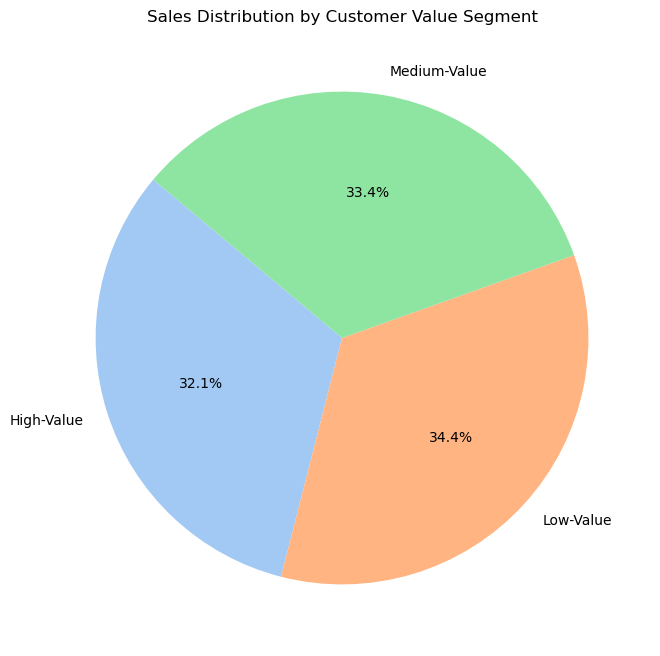

In [869]:
# Sum of sales per value segment for visualization
sales_per_value_segment = data_merged.groupby('Value Segment')['Sales'].sum().reset_index()

# Plot a pie chart for sales distribution by customer value segment
plt.figure(figsize=(8, 8))
plt.pie(sales_per_value_segment['Sales'], labels=sales_per_value_segment['Value Segment'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel", len(sales_per_value_segment['Value Segment'])))
plt.title('Sales Distribution by Customer Value Segment')
plt.show()

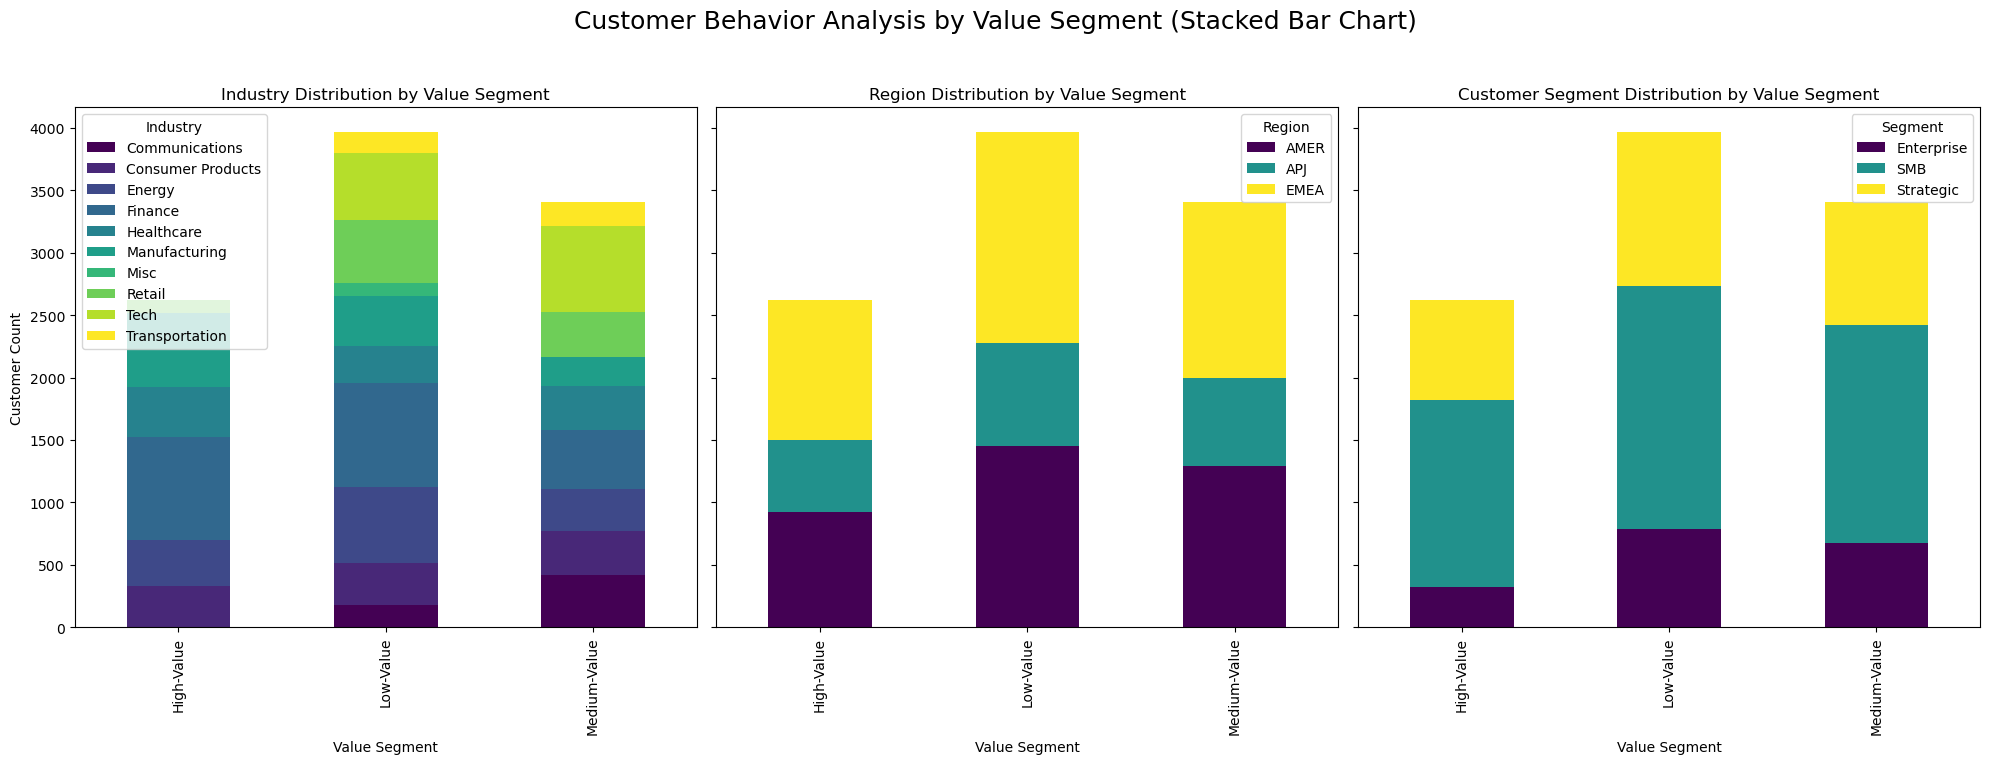

In [870]:
# Prepare data for stacked bar chart visualization by grouping and counting each attribute within value segments
# Count of each industry in each value segment
industry_counts = data_merged.groupby(['Value Segment', 'Industry']).size().unstack(fill_value=0)

# Count of each region in each value segment
region_counts = data_merged.groupby(['Value Segment', 'Region']).size().unstack(fill_value=0)

# Count of each customer segment (SMB, Strategic, Enterprise) in each value segment
customer_segment_counts = data_merged.groupby(['Value Segment', 'Segment']).size().unstack(fill_value=0)

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('Customer Behavior Analysis by Value Segment (Stacked Bar Chart)', fontsize=18)

# Plot stacked bar chart for Industries
industry_counts.plot(kind='bar', stacked=True, ax=axes[0], colormap="viridis")
axes[0].set_title('Industry Distribution by Value Segment')
axes[0].set_xlabel('Value Segment')
axes[0].set_ylabel('Customer Count')

# Plot stacked bar chart for Regions
region_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap="viridis")
axes[1].set_title('Region Distribution by Value Segment')
axes[1].set_xlabel('Value Segment')
axes[1].set_ylabel('')

# Plot stacked bar chart for Customer Segments (SMB, Strategic, Enterprise)
customer_segment_counts.plot(kind='bar', stacked=True, ax=axes[2], colormap="viridis")
axes[2].set_title('Customer Segment Distribution by Value Segment')
axes[2].set_xlabel('Value Segment')
axes[2].set_ylabel('')

# Display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

High-Value Customers:

Industri: Dominasi sektor Finance, Manufacturing, dan Healthcare.
Wilayah: Banyak pelanggan berasal dari EMEA dan AMER.
Produk: Produk seperti ContactMatcher, Support, dan SaaS Connector Pack menjadi yang paling populer.
Segmentasi Pelanggan: Mayoritas dari segmen SMB dan Strategic.
Medium-Value Customers:

Industri: Didominasi oleh sektor Tech, Finance, dan Communications.
Wilayah: Terdistribusi lebih merata di wilayah EMEA, AMER, dan APJ.
Produk: Produk seperti ContactMatcher dan Support tetap dominan, namun terdapat lebih banyak variasi.
Segmentasi Pelanggan: Mayoritas dari segmen SMB dengan peningkatan jumlah pelanggan dari Enterprise.
Low-Value Customers:

Industri: Sektor Finance, Energy, dan Tech memiliki jumlah pelanggan terbanyak.
Wilayah: Sebagian besar dari wilayah EMEA, namun diikuti oleh AMER dan APJ.
Produk: Produk seperti ContactMatcher dan Support masih populer, tetapi dengan sedikit variasi lainnya.
Segmentasi Pelanggan: Sebagian besar berasal dari SMB, dengan segmen Enterprise lebih besar dibandingkan dua segmen lainnya.

**Insight**

Berdasarkan hasil analisis, berikut adalah jawaban atas pertanyaan-pertanyaan tersebut:

>*Seberapa besar kontribusi penjualan dari masing-masing segmen pelanggan (High-Value, Medium-Value, dan Low-Value) terhadap total penjualan?*
>- **High-Value Customers:** Meski hanya berjumlah 19 pelanggan, segmen ini memberikan kontribusi penjualan terbesar. Ini menunjukkan bahwa segmen ini merupakan tulang punggung penjualan dan memerlukan fokus utama untuk menjaga kontribusi mereka.
>- **Medium-Value Customers:** Segmen ini memiliki kontribusi yang cukup besar, dengan jumlah pelanggan yang lebih banyak dibandingkan High-Value, menunjukkan adanya peluang untuk meningkatkan kontribusi mereka melalui strategi upsell.
>- **Low-Value Customers**: Segmen ini memiliki jumlah pelanggan terbesar, tetapi kontribusi penjualan mereka relatif kecil. Ini menunjukkan bahwa segmen ini bisa dijadikan target untuk meningkatkan nilai transaksi atau jumlah pembelian.

>*Karakteristik utama dari setiap segmen:*
>*Dari industri mana saja pelanggan dalam setiap segmen berasal?*
>*Wilayah mana yang menjadi pusat dari setiap segmen pelanggan?*
>*Produk apa yang paling populer di setiap segmen pelanggan?*

>**High-Value:**
>- *Industri:* Mayoritas berasal dari industri Finance, Manufacturing, dan Healthcare, yang menunjukkan fokus besar pada sektor-sektor ini.
>- *Wilayah*: Kebanyakan pelanggan berasal dari wilayah EMEA dan AMER, menunjukkan bahwa wilayah ini adalah pusat pelanggan bernilai tinggi.
>- *Produk*: Produk seperti ContactMatcher, Support, dan SaaS Connector Pack paling diminati, menunjukkan bahwa produk-produk ini penting untuk menjaga pelanggan bernilai tinggi.

>**Medium-Value**:
>- *Industri*: Tersebar di industri Tech, Finance, dan Communications, dengan pelanggan yang cukup beragam.
>- *Wilayah*: Sebagian besar berada di EMEA, tetapi juga ada pelanggan dari AMER dan APJ, menunjukkan potensi yang merata di seluruh wilayah.
>- *Produk*: Produk seperti ContactMatcher dan Support tetap populer, tetapi lebih beragam dibandingkan segmen High-Value.

>**Low-Value**:
>- *Industri*: Didominasi oleh sektor Finance, Energy, dan Tech, namun lebih tersebar dan tidak se-spesifik High-Value.
>- *Wilayah*: Wilayah EMEA tetap menjadi pusat, tetapi terdapat lebih banyak variasi wilayah yang lebih rendah kontribusinya.
>- *Produk*: ContactMatcher dan Support tetap populer, tetapi pembelian lebih tersebar pada beberapa produk lain.

### 7. Kesimpulan dan Rekomendasi Actionable
>- **Tujuan:**  Menyusun kesimpulan utama yang menyertakan rekomendasi actionable bagi tim sales, berdasarkan insight yang didapat dari analisis sebelumnya.
>- Berguna untuk menghasilkan rekomendasi yang spesifik dan actionable bagi tim sales, sehingga mereka dapat segera menerapkan strategi yang disarankan untuk meningkatkan penjualan.